In [1]:
import numpy as np

from utils import get_data, plot_prices

In [2]:
def SSA_predict(x, r, size=None):
    tau = (len(x) + 1) // 2
    n = len(x) + 1 - tau
    X = np.array([x[i: i + n] for i in range(tau)])
    _, V = np.linalg.eig(X @ X.T / n)
    v_tau = V[-1, : r]
    v_tau_V_spark_T = v_tau @ V[: tau - 1, : r].T
    denom = 1 - v_tau @ v_tau.T
    if size is None:
        Q = x[-tau + 1:]
        return (v_tau_V_spark_T @ Q) / denom
    else:
        res = np.empty(size)
        for i in range(size):
            Q = np.hstack([x[-tau + 1 + i:], res[: i]])
            res[i] = (v_tau_V_spark_T @ Q) / denom
        return res

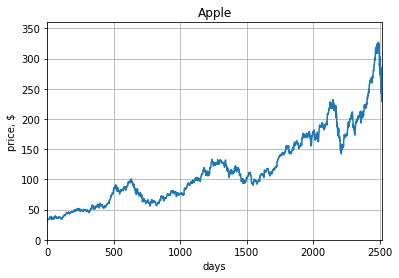

In [3]:
name = 'Apple'
data = get_data(name)
plot_prices(data, name)

In [4]:
print(data[-1])
data = data[:-1]

229.24


In [5]:
r = 200
print(SSA_predict(data, r))
%timeit -n 3 SSA_predict(data, r)

243.6853065612362
1.86 s ± 35.5 ms per loop (mean ± std. dev. of 7 runs, 3 loops each)
